<h3>1. Required libraries are imported</h3>

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sb

<h3> 2. Main statistics of Penguin dataset and Data Preprocess</h3>
<p> Null values and Unwanted columns are removed or replaced with median </p> 

In [170]:
data = pd.read_csv("~/documents/penguins.csv")

In [171]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [172]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [284]:
data.select_dtypes(exclude=object)

Index(['w_0', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [174]:
data.shape

(344, 8)

In [175]:
data.drop(['year'],axis=1,inplace=True)

In [176]:
data[data.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [177]:
data.dropna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


<h3>3. Converting Sting data type to categorical</h3></h3>
<p>Replacing categorical values with numericals like 0,1,2..</p>

In [178]:
species,island,sex = set(data['species']),set(data['island']),set(data['sex'])

In [179]:
def change(var):
    return dict(zip(var,list(range(len(var)))))

In [180]:
species,island,sex = change(species),change(island),change(sex)

In [181]:
species

{'Chinstrap': 0, 'Gentoo': 1, 'Adelie': 2}

In [182]:
data.replace(species,inplace=True)
data.replace(island,inplace=True)
data.replace(sex, inplace=True)
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,0,39.1,18.7,181.0,3750.0,2
1,2,0,39.5,17.4,186.0,3800.0,1
2,2,0,40.3,18.0,195.0,3250.0,1
3,2,0,0.0,0.0,0.0,0.0,0
4,2,0,36.7,19.3,193.0,3450.0,1


<h3>4. Using the below Correlation graph, the Target and features are selected</h3>
<p> and Bais column is added  as the first column of the dataframe</p>

Text(0.5, 1.0, 'Heat Map')

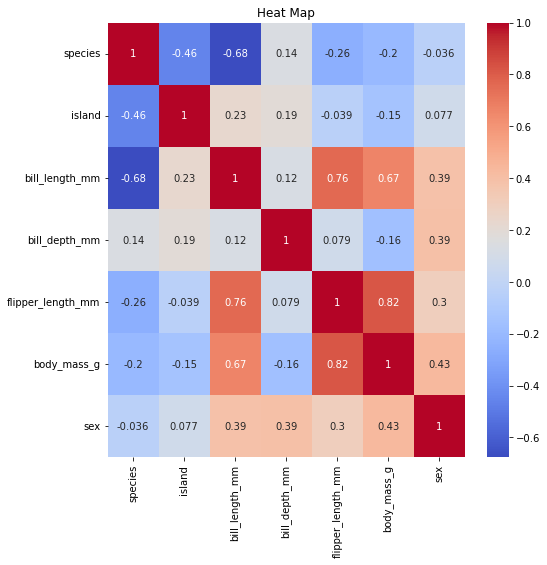

In [183]:
d = data.corr()
pt.figure(figsize=(8,8))
sb.heatmap(d,annot=True,cmap='coolwarm')
pt.title("Heat Map")

In [184]:
if 'w_0' not in data.columns: # checks if the bias column present.
    w_0 = np.ones(len(data))
    w_0=pd.DataFrame({'w_0':w_0})
    data = pd.concat([w_0,data],axis=1)
data.columns

Index(['w_0', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [185]:
data.head()

,w_0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,2,0,39.1,18.7,181.0,3750.0,2
1,1.0,2,0,39.5,17.4,186.0,3800.0,1
2,1.0,2,0,40.3,18.0,195.0,3250.0,1
3,1.0,2,0,0.0,0.0,0.0,0.0,0
4,1.0,2,0,36.7,19.3,193.0,3450.0,1


<h3>5. Normalize and Choose input and target variables</h3> 

In [186]:
for i in data.iloc[:,1:]:
    p = data.loc[:,i]
    data.loc[:,i] = (p - min(p))/(max(p)-min(p))

In [187]:
cols = ['w_0',*data.columns[4:-1]]
inputs = data.loc[:,cols]
target = data['bill_length_mm']

<h3>6. Split the data into traing and testing (80:20).</h3>

In [188]:
n=int(len(inputs)*0.8)
m=data.shape[0]-n

In [189]:
trainx = np.array(inputs.iloc[:n])
trainy = np.array(target.iloc[:n]).reshape((n,1))

testx = np.array(inputs.iloc[n:])
testy = np.array(target.iloc[n:]).reshape((m,1))

<h3>7. Shape of Train and Test sets</h3>

In [190]:
trainx.shape,testx.shape,trainy.shape,testy.shape

((275, 4), (69, 4), (275, 1), (69, 1))

<h3>8. Calculate Weights with OLS Equations</h3>

In [191]:
k=np.dot(trainx.T,trainx)
a=np.linalg.inv(k)
b=np.dot(trainx.T, trainy)
ws = np.dot(a,b)
ws=ws.reshape((1,4))[0]
print("weights = ",ws)

weights =  [ 0.0089036  -0.0258002   0.58432775  0.31537928]


<h3>9. Predictions and calculate MSE.</h3>

In [192]:
predict_trainy=trainx.dot(ws)
predicty=testx.dot(ws)

predicty.shape

(69,)

In [193]:
dt=pd.DataFrame({'Acutal':testy.T[0],'Prediction':predicty.T[0]})
dt.head()

,Acutal,Prediction
0,0.837248,0.798704
1,0.780201,0.798704
2,0.838926,0.798704
3,0.860738,0.798704
4,0.761745,0.798704


Text(0, 0.5, 'Predicted')

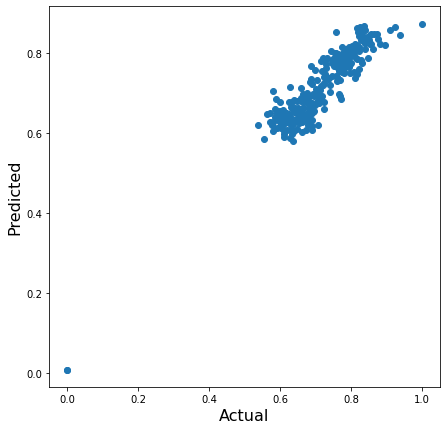

In [260]:
pt.figure(figsize=(7,7))
pt.scatter(trainy,predict_trainy)
#plt.plot(test_y,pred_y)
pt.xlabel("Actual",fontsize=16)
pt.ylabel("Predicted",fontsize=16)

Text(0.5, 1.0, 'Actual Vs Preditions')

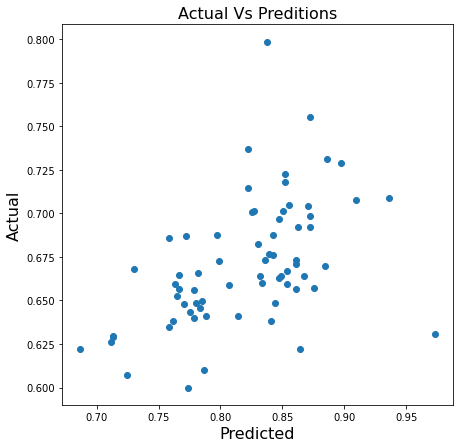

In [261]:
pt.figure(figsize=(7,7))
pt.scatter(testy,predicty)
pt.xlabel("Predicted",fontsize=16)
pt.ylabel("Actual",fontsize=16)
pt.title("Actual Vs Preditions",fontsize=16)

<h3>10. Comparing OLS and MSE for Train and Test Data</h3>

In [195]:
trainmse_ols=(1/(n+m))*np.sum((predict_trainy-trainy)**2)

trainss_ols=(1/2)*np.sum((predict_trainy-trainy)**2)

print("mean squared loss for training = ",trainmse_ols)
print("OLS on squared loss training = ",trainss_ols)

mean squared loss for training =  4.608777334925114
OLS on squared loss training =  792.7097016071197


In [196]:
mse_ols=(1/(n+m))*np.sum((predicty-testy)**2)

ss_ols=(1/2)*np.sum((predicty-testy)**2)

mse_ols,ss_ols
print("mean squared loss testing= ",mse_ols)
print("OLS on squared loss testing = ",ss_ols)

mean squared loss testing=  0.36621188654960907
OLS on squared loss testing =  62.98844448653276


<h2>PART 4</h2>
<h3> Ridge regression</h3>
<p>Continuation from Part 3(reusing Data) </p>


In [278]:
l = 0.8
k=np.dot(trainx.T,trainx)+l*np.identity(inputs.shape[1])
a=np.linalg.inv(k)
b=np.dot(trainx.T, trainy)
r_weights = np.dot(a,b)
w0,w1,w2,w3=r_weights

<h3>Get the train and test Predictions</h3>

In [ ]:
ypred_train = np.dot(trainx,r_weights)
ypred_test = np.dot(testx,r_weights)


In [251]:

ypred_train = ypred_train.reshape((trainy.shape[0],1))
ypred_test = ypred_test.reshape((testy.shape[0],1))

<h3>Finding Loss values for Train and Test</h3>

In [280]:
r_loss=0.5*np.sum((testy-ypred_test)**2)
c=0.5*l*np.dot(r_weights.T,r_weights)

r_loss=r_loss+c
r_mse=(1/inputs.shape[0])*np.sum((testy-ypred_test)**2)

print('Loss using the weights: ',r_loss[0][0])
print('MSE using the weights: ',r_mse)


Loss using the weights:  0.9578674810084504
MSE using the weights:  0.0048330973230507135


<h3>Weights</h3>

In [281]:
print("weights using Ridge:",r_weights.reshape((1,len(ws)))[0])
print("weights using OLS = ",ws)

weights using Ridge: [0.0915664  0.01139947 0.40829786 0.37578632]
weights using OLS =  [ 0.0089036  -0.0258002   0.58432775  0.31537928]


In [254]:
predy=np.dot(testx,r_weights)

<h3>Actual vs prediction values comparision</h3>

In [255]:
pd.DataFrame({'actual':testy.T[0],'pred': ypred_test.T[0]})

Actual vs prediction comparision


,actual,pred
0,0.837248,0.798688
1,0.780201,0.649192
2,0.838926,0.680970
3,0.860738,0.660596
4,0.761745,0.644037
...,...,...
64,0.936242,0.706536
65,0.729866,0.661008
66,0.832215,0.667522
67,0.852349,0.717380


<h3> Visualizations of Actual vs Predictions</h3>

Text(0, 0.5, 'Predicted')

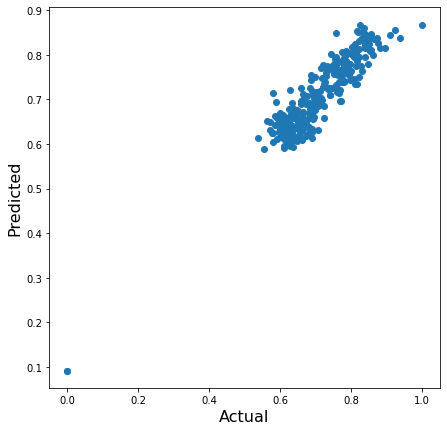

In [262]:
pt.figure(figsize=(7,7))
pt.scatter(trainy,ypred_train)
#plt.plot(test_y,pred_y)
pt.xlabel("Actual",fontsize=16)
pt.ylabel("Predicted",fontsize=16)

Text(0, 0.5, 'Predicted')

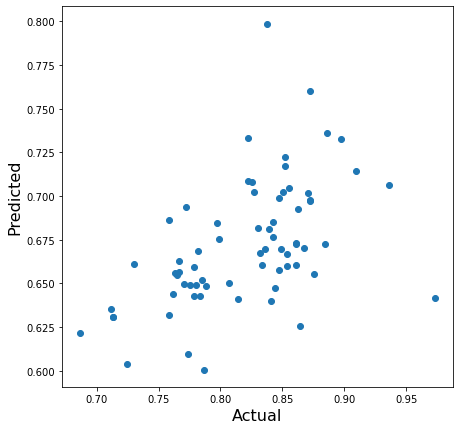

In [263]:
pt.figure(figsize=(7,7))
pt.scatter(testy,ypred_test)
#plt.plot(test_y,pred_y)
pt.xlabel("Actual",fontsize=16)
pt.ylabel("Predicted",fontsize=16)

<h3>Gradient Descent</h3>

In [225]:
class ridge():
    def __init__(self,iters,lr,lamda=3):
        self.iters = iters
        self.lamda = lamda
        self.lr = lr
        
    def process(self,trainx,trainy):
        n=trainx.shape[0]
        w=np.zeros((1,trainx.shape[1]))
        
        for i in range(self.iters):
            wi=self.update_w(w,trainx,trainy,n,b)
            w=w-(self.lr*wi.T)
            #print(w)
        return w
    
    def update_w(self,w,x,y,n,b):
        predicted = y - x.dot(w.T)
        wi = -(x.T.dot(predicted)) + self.lamda*w.T
        return wi
        
    def predict(self,x,w):
        predy = np.dot(w,x.T)
        return predy

In [241]:
obj1=ridge(100000,0.0011)
w=obj1.process(trainx,trainy)
preds=obj1.predict(testx,w)
pred_train=obj1.predict(trainx,w)

In [269]:
predicts=pd.DataFrame(preds.T)
predicts.columns=['Test Predictions']
predicts.head()

,Test Predictions
0,0.786127
1,0.657119
2,0.688622
3,0.669977
4,0.654873


In [270]:
predict_t=pd.DataFrame(pred_train.T)
predict_t.columns=['Train Predictions']
predict_t.head()

,Train Predictions
0,0.657379
1,0.663887
2,0.647885
3,0.151578
4,0.659274


Text(0, 0.5, 'Predicted')

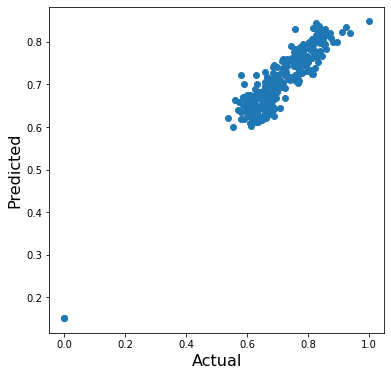

In [265]:
pt.figure(figsize=(6,6))
pt.scatter(trainy,pred_train)
#plt.plot(test_y,pred_y)
pt.xlabel("Actual",fontsize=16)
pt.ylabel("Predicted",fontsize=16)

Text(0, 0.5, 'Predicted')

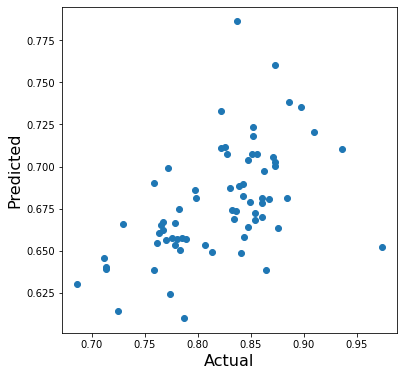

In [268]:
pt.figure(figsize=(6,6))
pt.scatter(testy,preds)
#plt.plot(test_y,pred_y)
pt.xlabel("Actual",fontsize=16)
pt.ylabel("Predicted",fontsize=16)

In [277]:
rgd_mse=(1/testy.shape[0])*np.sum((testy-preds.T)**2)
rgd_mse

0.022195248372577026